In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import random
from decimal import Decimal
from itertools import accumulate

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sns.set_theme(style="whitegrid")


In [2]:
def random_snorm(n, mean = 0, sd = 1, xi = 1.5):
    def random_snorm_aux(n, xi):
        weight = xi/(xi + 1/xi)
        z = np.random.uniform(-weight,1-weight,n)
        xi_ = xi**np.sign(z)
        random = -np.absolute(np.random.normal(0,1,n))/xi_ * np.sign(z)
        m1 = 2/np.sqrt(2 * np.pi)
        mu = m1 * (xi - 1/xi)
        sigma = np.sqrt((1 - m1**2) * (xi**2 + 1/xi**2) + 2 * m1**2 - 1)
        return (random - mu)/sigma

    return random_snorm_aux(n, xi) * sd + mean

In [3]:
def randn_skew_fast(N, skew=0.0, centre=0.0, std=1.0):
    sigma = skew / np.sqrt(1.0 + skew**2) 
    u0 = np.random.randn(N)
    v = np.random.randn(N)
    u1 = (sigma*u0 + np.sqrt(1.0 - sigma**2)*v) * std
    u1[u0 < 0] *= -1
    u1 = u1 + centre
    return u1

In [4]:
def Rand_Return(Mkt_Ann_Rate = 0.06, Mkt_Ann_Std = 0.12, Inflation = 0.02):    
    # Applied Returns
    Applied_Return = ((1 + Mkt_Ann_Rate)**(1/365))-1
    # Applied Returns Standard Deviation
    Applied_STD_Return = Mkt_Ann_Std/np.sqrt(365)
    # Applied Inflation
    Appied_Inflation = ((1 + Inflation)**(1/365))-1

    return Applied_Return, Applied_STD_Return, Appied_Inflation

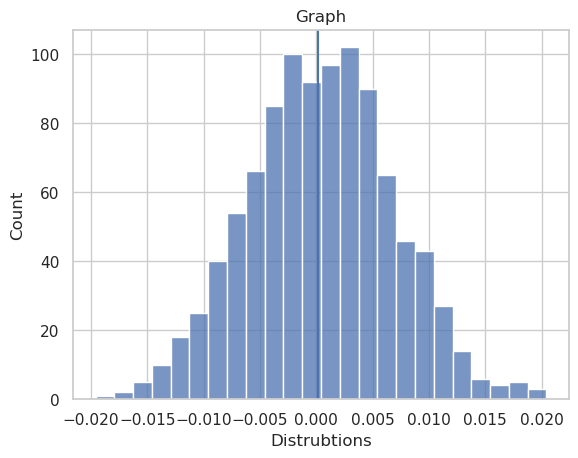

In [5]:
NUM_SAMPLES = 1000
Used_factors = []
Return, std, inflation = Rand_Return()
q = random_snorm(NUM_SAMPLES,Return,std,1)
sns.histplot(q)
plt.ylabel('Count')
plt.title('Graph')
plt.axvline(Return)
plt.xlabel('Distrubtions')
plt.show()

#### Source of my random skewed n-distrbution

https://stackoverflow.com/questions/36200913/generate-n-random-numbers-from-a-skew-normal-distribution-using-numpy

In [6]:
def Accumulation(nper, pmt, freqn, pv=0, arrears=True):
    
    rate, std, inflation = Compound_Return(freqn)
    
    Data = pd.DataFrame(columns = ['Period', 'Amount'])
    for p in range(nper):
        #print(p, pv)
        pv = (pv * (1 + rate)) + pmt
        #pv =+ pmt
        Data = Data.append({'Period': p, 'Amount': pv}, ignore_index = True)
    return Data

## This function run a contribution ledger with randomized market changes on daily basis (365) 

In [7]:
def Generate_GT(annually,mkt_rtn,start='1990-01-01' , pv=0):
    #start_date = '1990-01-01'
    dates_used = pd.date_range(start=start,end='2021-12-31')
    Weekly = round(annually / 52,2)
    Bi_Weekly  = round(annually / 26,2)
    Semi_Monthly = round(annually / 24,2)
    Monthly = round(annually / 12,2)
    Quarterly = round(annually / 4,2) 
    Semi_Annaully = round(annually / 2,2)
    df = pd.DataFrame(columns=['Date','Weekly', 'Bi-Weekly','Semi-Monthly',
                               'Monthly', 'Quarterly', 'Semi-Annaully', 'Annually'])
    #r = mkt_rtn
    Return, std, inflation = Rand_Return(mkt_rtn)
    q = 1
    r = random_snorm(1,Return,std,1)
    
    Accum_wk = 0
    Accum_biwk = 0
    Accum_smth = 0
    Accum_mth = 0
    Accum_qrt = 0
    Accum_sman = 0
    Accum_an = 0
       
    for i in range(len(dates_used)):
        r = float(random_snorm(1,Return,std,1))
        # Weekly 
        wk = Weekly if (dates_used[i].dayofweek == 0) else 0
        Accum_wk = wk + (Accum_wk * (1+r)) # Weekly
        # Bi-weekly 
        biwk = Bi_Weekly if (i + 1) % 14 == 0 else 0
        Accum_biwk = biwk + (Accum_biwk * (1+r)) # Bi-Weekly
        # Semi-Monthly  
        smth = Semi_Monthly if (dates_used[i].day == dates_used[i].daysinmonth or dates_used[i].day == dates_used[i].daysinmonth // 2) else 0
        Accum_smth = smth + (Accum_smth * (1+r)) # Semi-Monthly
        # Monthly 
        mth= Monthly if (dates_used[i].day == dates_used[i].daysinmonth) else 0
        Accum_mth = mth + (Accum_mth * (1+r)) # Monthly
        # Quarterly 
        qrt= Quarterly if (dates_used[i].month % 3 == 1)* (dates_used[i].day == 1) == 1 else 0
        Accum_qrt = qrt + (Accum_qrt * (1+r)) # Quarterly
        # Semi-Annually 
        sman= Semi_Annaully if (dates_used[i].month % 6 == 1)* (dates_used[i].day == 1) == 1 else 0
        Accum_sman = sman + (Accum_sman * (1+r)) # Semi-Annually
        # Annually 
        an = annually if (dates_used[i].month % 12 == 1)* (dates_used[i].day == 1) == 1 else 0
        Accum_an = an + (Accum_an * (1+r)) # Annually
        
        df = df.append({'Date' : pd.to_datetime(dates_used[i],format='%Y%m%d'),
                        'Weekly' :  np.round(Accum_wk,2) ,
                        'Bi-Weekly' : np.round(Accum_biwk,2) ,
                        'Semi-Monthly' : np.round(Accum_smth,2) ,  
                        'Monthly' : np.round(Accum_mth,2) ,
                        'Quarterly' : np.round(Accum_qrt,2) ,
                        'Semi-Annaully' : np.round(Accum_sman,2) ,
                        'Annually': np.round(Accum_an,2)},
                       ignore_index = True)

    return df #Ledger

In [8]:
Return, std, inflation = Rand_Return(0.06)
q = 1
r = float(random_snorm(1,Return,std,1))
r

-0.002189350282650812

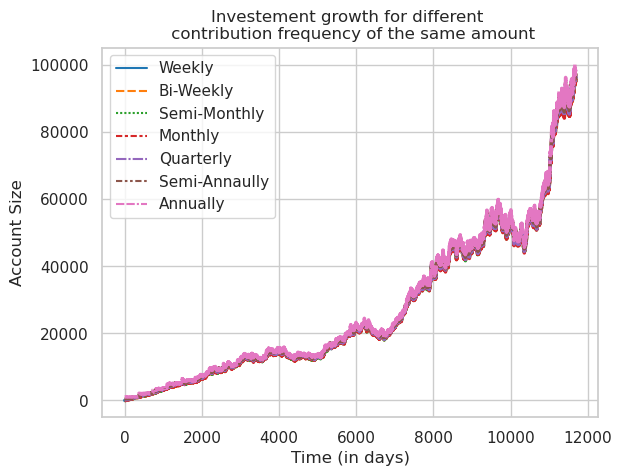

In [9]:
zz = Generate_GT(1000,0.06)

sns.lineplot(palette="tab10", linewidth=2.5, data=zz)
plt.xlabel('Time (in days)')
plt.ylabel('Account Size')
plt.title('Investement growth for different \n contribution frequency of the same amount')
plt.show()

i = 0 
fig = plt.figure()

while i < 5:
    xx = Generate_GT(1000,0.06)
    plt.plot(pd.to_datetime(xx['Date'],format='%Y'), xx['Annually'])
    i+=1
#sns.lineplot(palette="tab10", linewidth=2.5, data=zz)
plt.xlabel('Time (in days)')
plt.xticks(rotation=45)
plt.ylabel('Account Size')
plt.title('Investement growth for different \n contribution frequency of the same amount')
plt.show()    

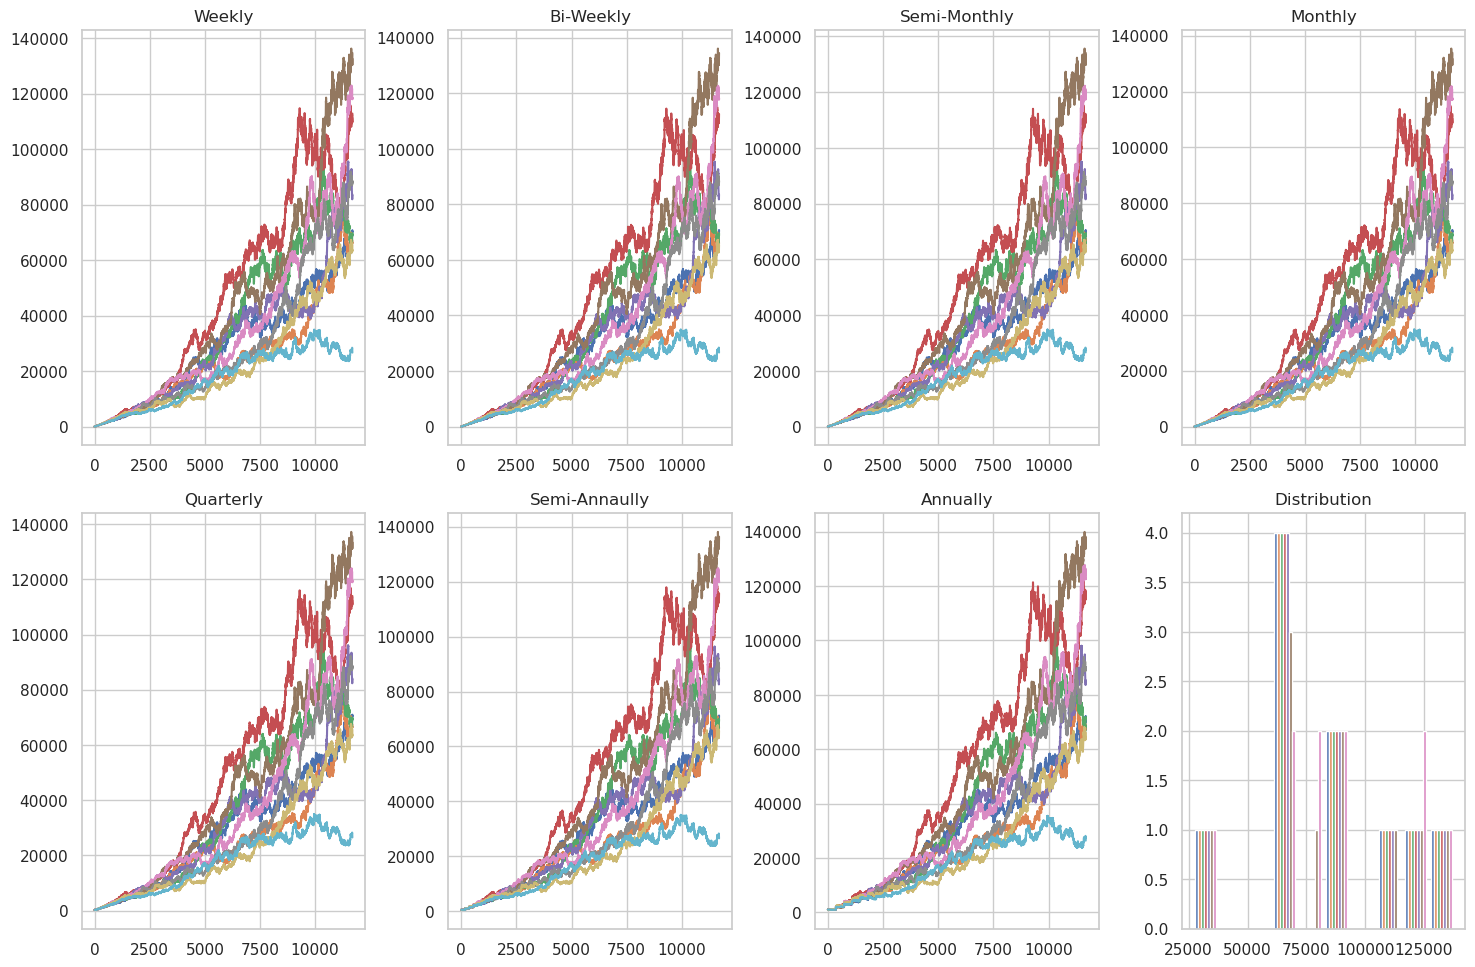

<Figure size 640x480 with 0 Axes>

In [10]:
fig, ax = plt.subplots(2, 4, figsize = (15, 10))
fig.tight_layout(pad = 2)
#zzz = Generate_GT(1000,0.06)
# you name the plot and you could loop on it.
#fig.title('Investement growth for different \n contribution frequency of the same amount')
GL = pd.DataFrame(columns=['Date','Weekly', 'Bi-Weekly','Semi-Monthly','Monthly', 'Quarterly', 'Semi-Annaully', 'Annually'])
jj = 0
while jj < 10:
    zzz = Generate_GT(1000,0.06)
    ax[0, 0].plot(zzz['Weekly'])
    ax[0, 0].set_title('Weekly')
   

    ax[0, 1].plot(zzz['Bi-Weekly'])
    ax[0, 1].set_title('Bi-Weekly')

    ax[0, 2].plot(zzz['Semi-Monthly'])
    ax[0, 2].set_title('Semi-Monthly')

    ax[0, 3].plot(zzz['Monthly'])
    ax[0, 3].set_title('Monthly')

    ax[1, 0].plot(zzz['Quarterly'])
    ax[1, 0].set_title('Quarterly')

    ax[1, 1].plot(zzz['Semi-Annaully'])
    ax[1, 1].set_title('Semi-Annaully')

    ax[1, 2].plot(zzz['Annually'])
    ax[1, 2].set_title('Annually')
    GL = GL.append(zzz.tail(1))
    jj += 1


GL = GL.drop(['Date'],axis=1)
    
ax[1, 3].hist(GL, bins=10)
ax[1, 3].set_title('Distribution')


#df['DMDHHSIZ'].hist(ax = ax[0, 2])
#df.groupby('DMDEDUC2')['BPXSY1'].mean().plot(ax = ax[0, 1], kind='pie', colors = ['lightgreen', 'coral', 'pink', 'violet', 'skyblue'])
plt.show()
plt.savefig('charts.png')

### Decumulation Section ####

This section is to find out the taxable impact of each contribution frequency. For RIFF accounts there is a legally required contribution based on the policy's age (assuming single). 

In [11]:
RIFF_MIN = [
  {
    "age at start of year": "65",
    "rrif minimum payout percentage": "4.00%"
  },
  {
    "age at start of year": "66",
    "rrif minimum payout percentage": "4.17%"
  },
  {
    "age at start of year": "67",
    "rrif minimum payout percentage": "4.35%"
  },
  {
    "age at start of year": "68",
    "rrif minimum payout percentage": "4.55%"
  },
  {
    "age at start of year": "69",
    "rrif minimum payout percentage": "4.76%"
  },
  {
    "age at start of year": "70",
    "rrif minimum payout percentage": "5.00%"
  },
  {
    "age at start of year": "71",
    "rrif minimum payout percentage": "5.28%"
  },
  {
    "age at start of year": "72",
    "rrif minimum payout percentage": "5.40%"
  },
  {
    "age at start of year": "73",
    "rrif minimum payout percentage": "5.53%"
  },
  {
    "age at start of year": "74",
    "rrif minimum payout percentage": "5.67%"
  },
  {
    "age at start of year": "75",
    "rrif minimum payout percentage": "5.82%"
  },
  {
    "age at start of year": "76",
    "rrif minimum payout percentage": "5.98%"
  },
  {
    "age at start of year": "77",
    "rrif minimum payout percentage": "6.17%"
  },
  {
    "age at start of year": "78",
    "rrif minimum payout percentage": "6.36%"
  },
  {
    "age at start of year": "79",
    "rrif minimum payout percentage": "6.58%"
  },
  {
    "age at start of year": "80",
    "rrif minimum payout percentage": "6.82%"
  },
  {
    "age at start of year": "81",
    "rrif minimum payout percentage": "7.08%"
  },
  {
    "age at start of year": "82",
    "rrif minimum payout percentage": "7.38%"
  },
  {
    "age at start of year": "83",
    "rrif minimum payout percentage": "7.71%"
  },
  {
    "age at start of year": "84",
    "rrif minimum payout percentage": "8.08%"
  },
  {
    "age at start of year": "85",
    "rrif minimum payout percentage": "8.51%"
  },
  {
    "age at start of year": "86",
    "rrif minimum payout percentage": "8.99%"
  },
  {
    "age at start of year": "87",
    "rrif minimum payout percentage": "9.55%"
  },
  {
    "age at start of year": "88",
    "rrif minimum payout percentage": "10.21%"
  },
  {
    "age at start of year": "89",
    "rrif minimum payout percentage": "10.99%"
  },
  {
    "age at start of year": "90",
    "rrif minimum payout percentage": "11.92%"
  },
  {
    "age at start of year": "91",
    "rrif minimum payout percentage": "13.06%"
  },
  {
    "age at start of year": "92",
    "rrif minimum payout percentage": "14.49%"
  },
  {
    "age at start of year": "93",
    "rrif minimum payout percentage": "16.34%"
  },
  {
    "age at start of year": "94",
    "rrif minimum payout percentage": "18.79%"
  },
  {
    "age at start of year": "95 and older",
    "rrif minimum payout percentage": "20.00%"
  }
]

In [12]:
BPA = {'FED':15000,
       'AB':19814,
       'BC':11981,
       'MB':10855,
       'NB':12458,
       'NL':10382,
       'NS':11481,
       'NT':16593,
       'NU':17925,
       'ON':11865,
       'PE':12000,
       'QC':17183,
       'SK':17661,
       'YT':15000}

TAX_RATE = {'FED':[0.15, 0.205, 0.26, 0.29, 0.33],
            'AB':[0.1, 0.12, 0.13, 0.14, 0.15],
            'BC':[0.0506, 0.077, 0.105, 0.1229, 0.147, 0.168, 0.205],
            'MB':[0.108, 0.1275, 0.174],
            'NB':[0.094, 0.14, 0.16, 0.195],
            'NL':[0.087, 0.145, 0.158, 0.178, 0.198, 0.208, 0.213, 0.218],
            'NS':[0.0879, 0.1495, 0.1667, 0.175, 0.21],
            'NT':[0.059, 0.086, 0.122, 0.1405],
            'NU':[0.04, 0.07, 0.09, 0.115],
            'ON':[0.0505, 0.0915, 0.1116, 0.1216, 0.1316],
            'PE':[0.098, 0.138, 0.167],
            'QC':[0.15, 0.2, 0.24, 0.2575],
            'SK':[0.105, 0.125, 0.145],
            'YT':[0.064, 0.09, 0.109, 0.128, 0.15]}

up_lim = 9_999_999
TAX_AMNT = {'FED':[53359,106717,165430,235675,up_lim],
            'AB':[142292,170751,227668,341502,up_lim],
            'BC':[45654,91310,104835,127299,172602,240716,up_lim],
            'MB':[36842,79625,up_lim],
            'NB':[47715,95431,176756,up_lim],
            'NL':[41457,82913,148027,207239,264750,529500,1059000,up_lim],
            'NS':[29590,59180,93000,150000,up_lim],
            'NT':[48326,96655,157139,up_lim],
            'NU': [50877,101754,165429,up_lim],
            'ON':[49231,98463,150000,220000,up_lim],
            'PE':[31984, 63969, up_lim],
            'QC': [49275,98540,119910,up_lim],
            'SK':[49720, 142058,up_lim],
            'YT':[53359,106717,165430,500000,up_lim]}

In [13]:
# I hate taxes

def my_full_tax(income,prov_code):
    # prov based taxes will begin with pr, federal will begin with fed
    x = income
    
    fed_bpa = BPA['FED']
    fed_rates = TAX_RATE['FED']
    fed_amnts = TAX_AMNT['FED']

    pr_bpa = BPA[prov_code]
    pr_rates = TAX_RATE[prov_code]
    pr_amnts = TAX_AMNT[prov_code]

    pr_brkt_limit = []
    fed_brkt_limit = []
    
    pr_last_max_brckt = 0
    pr_full_last_brckt = 0 
    pr_crnt_brckt_rate = 0 
    
    fed_last_max_brckt = 0 # upper limit of the nearest fully utilized bracket - > if 0: get BPA else continue
    fed_full_last_brckt = 0  # full taxable amount on the nearest bracket -> 
    fed_crnt_brckt_rate = 0  # current tax rate for last amount

### ----- #### PROV ### ----- ####    
    for pr in range(len(pr_amnts)):
        pr_last_max_brckt = pr_amnts[pr] if pr_amnts[pr] <= x else pr_last_max_brckt
        pr_appender = 0 
        pr_appender = pr_rates[pr] * (pr_amnts[pr] - pr_bpa) if pr == 0 else pr_rates[pr] * (pr_amnts[pr] - pr_amnts[pr-1])
        pr_brkt_limit.append(pr_appender)
    
        pr_brkt_limit = list(accumulate(pr_brkt_limit))

 ### ----- #### FEDERAL ### ----- ####
    for fed in range(len(fed_amnts)):
        fed_last_max_brckt = fed_amnts[fed] if fed_amnts[fed] <= x else fed_last_max_brckt
        
        fed_appender = 0 
        fed_appender = fed_rates[fed] * (fed_amnts[fed] - fed_bpa) if fed == 0 else fed_rates[fed] * (fed_amnts[fed] - fed_amnts[fed-1])
        fed_brkt_limit.append(fed_appender)
        
        fed_brkt_limit = list(accumulate(fed_brkt_limit))
 
### ----- #### Calculations ### ----- ####
    pr_crnt_brckt_rate = pr_rates[pr_amnts.index(pr_last_max_brckt)+1] if pr_last_max_brckt != 0 else pr_rates[0]
    pr_full_last_brckt = pr_brkt_limit[pr_amnts.index(pr_last_max_brckt)] if pr_last_max_brckt != 0 else 0
    
    fed_crnt_brckt_rate = fed_rates[fed_amnts.index(fed_last_max_brckt)+1] if fed_last_max_brckt != 0 else fed_rates[0]
    fed_full_last_brckt = fed_brkt_limit[fed_amnts.index(fed_last_max_brckt)] if fed_last_max_brckt != 0 else 0
    
    fed_tax = round(((x - max(fed_last_max_brckt,fed_bpa)) * fed_crnt_brckt_rate) + fed_full_last_brckt,2)
    prov_tax = round(((x - max(pr_last_max_brckt,pr_bpa)) * pr_crnt_brckt_rate) + pr_full_last_brckt,2)
    
    #return prov_tax
    return fed_tax + prov_tax

#Federal
FED_RATE =[0.15, 0.205, 0.26, 0.29, 0.33]
FED_AMNT = [53359,106717,165430,235675,up_lim]

#Alberta
AB_RATE = [0.1, 0.12, 0.13, 0.14, 0.15]
AB_AMNT = [142292,170751,227668,341502,up_lim]

#British Columbia
BC_RATE = [0.0506, 0.077, 0.105, 0.1229, 0.147, 0.168, 0.205]
BC_AMNT = [45654,91310,104835,127299,172602,240716,up_lim]

#Manitoba
MB_RATE = [0.108, 0.1275, 0.174]
MB_AMNT = [36842,79625,up_lim]

#New Brunswick
NB_RATE = [0.094, 0.14, 0.16, 0.195]
NB_AMNT = [47715,95431,176756,up_lim]

#Newfoundland and Labrador
NL_RATE = [0.087, 0.145, 0.158, 0.178, 0.198, 0.208, 0.213, 0.218]
NL_AMNT = [41457,82913,148027,207239,264750,529500,1059000,up_lim]

#Nova Scotia
NS_RATE = [0.0879, 0.1495, 0.1667, 0.175, 0.21]
NS_AMNT = [29590,59180,93000,150000,up_lim]

#Ontario
ON_RATE = [0.0505, 0.0915, 0.1116, 0.1216, 0.1316]
ON_AMNT = [49231,98463,150000,220000,up_lim]

#Prince Edward Island
PE_RATE = [0.098, 0.138, 0.167]
PE_AMNT = [31984, 63969, up_lim]

#Quebec
QC_RATE = [0.15, 0.2, 0.24, 0.2575]
QC_AMNT = [49275,98540,119910,up_lim]

#Saskatchewan
SK_RATE = [0.105, 0.125, 0.145]
SK_AMNT = [49720, 142058,up_lim]

#Northwest Territories
NT_RATE = [0.059, 0.086, 0.122, 0.1405]
NT_AMNT = [48326,96655,157139,up_lim]

#Nunavut
NU_RATE = [0.04, 0.07, 0.09, 0.115]
NU_AMNT = [50877,101754,165429,up_lim]

#Yukon
YT_RATE = [0.064, 0.09, 0.109, 0.128, 0.15]
YT_AMNT = [53359,106717,165430,500000,up_lim]

def my_prov_tax(income,prov_code):
    # prov based taxes will begin with pr, federal will begin with fed
    x = income
    my_bpa = BPA[prov_code]
    my_rates = TAX_RATE[prov_code]
    my_amnts = TAX_AMNT[prov_code]

    brkt_limit = []
    
    Last_Max_Brckt = 0
    Full_Last_Brckt = 0 
    Currnt_Brckt_Rate = 0 


    for s in range(len(my_amnts)):
        Last_Max_Brckt = my_amnts[s] if my_amnts[s] <= x else Last_Max_Brckt
        appender = 0
        appender = my_rates[s] * (my_amnts[s] - my_bpa) if s == 0 else my_rates[s] * (my_amnts[s] - my_amnts[s-1])
        brkt_limit.append(appender)
        
        #if s == 0:
        #    brkt_limit.append(my_rates[s] * (my_amnts[s] - my_bpa))
        #else:
        #    brkt_limit.append(my_rates[s] * (my_amnts[s] - my_amnts[s-1]))
        
        brkt_limit = list(accumulate(brkt_limit))
    
    Currnt_Brckt_Rate = my_rates[my_amnts.index(Last_Max_Brckt)+1]
    Full_Last_Brckt = brkt_limit[my_amnts.index(Last_Max_Brckt)]
    
    Prov_Tax = round(((x - Last_Max_Brckt) * Currnt_Brckt_Rate) + Full_Last_Brckt,2)
    #return brkt_limit[:-1]
    return Prov_Tax

def my_fed_tax(income):
    
    x = income
    my_bpa = BPA['FED']
    my_rates = TAX_RATE['FED']
    my_amnts = TAX_AMNT['FED']

    brkt_limit = []
    
    Last_Max_Brckt = 0
    Full_Last_Brckt = 0 
    Currnt_Brckt_Rate = 0 


    for s in range(len(my_amnts)):
        Last_Max_Brckt = my_amnts[s] if my_amnts[s] <= x else Last_Max_Brckt

        if s == 0:
            brkt_limit.append(my_rates[s] * (my_amnts[s] - my_bpa))
        else:
            brkt_limit.append(my_rates[s] * (my_amnts[s] - my_amnts[s-1]))
        
        brkt_limit = list(accumulate(brkt_limit))
    
    Currnt_Brckt_Rate = my_rates[my_amnts.index(Last_Max_Brckt)+1] if Last_Max_Brckt != 0 else my_rates[0]
    Full_Last_Brckt = brkt_limit[my_amnts.index(Last_Max_Brckt)] if Last_Max_Brckt != 0 else 0
    
    myTax = round(((x - max(my_bpa,Last_Max_Brckt)) * Currnt_Brckt_Rate) + Full_Last_Brckt,2)
    #return brkt_limit[:-1]
    return myTax